In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

# Persamaan Kalor - Metode Eksplisit

Rentang x = 0 sampai dengan x = 1, dengan selang diskritisasi h = 0.25

In [4]:
h = 0.25
A = 0.0
B = 1.0
Nx = int( (B-A)/h ) + 1
Nx

5

In [6]:
x = np.linspace(A,B, Nx)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Waktu t = 0 sampai dengan t = 1, dengan selang k = 0.25

In [33]:
k = 0.025
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
Nt

41

In [34]:
t = np.linspace(tmin, tmax, Nt)
t

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

Array suhu, dua dimensi

In [35]:
T = np.zeros( (Nx,Nt) )

Aplikasi syarat batas t = 0 (atau syarat awal)

$$
T(x, t=0) = \sin(\pi x )
$$

In [37]:
T[:,0] = np.sin(np.pi * x)

Text(0.0, 1.0, 't = 0')

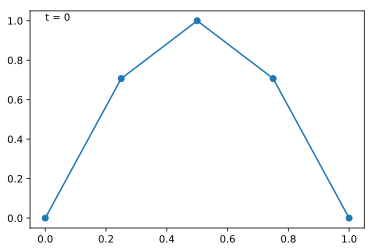

In [38]:
plt.clf()
plt.plot(x, T[:,0], marker="o")
plt.text( 0.0, 1.0, "t = 0")

Metode eksplisit
$$
T(x,t+k) = \lambda T(x-h,t) + (1-2\lambda)*T(x,t) + \lambda T(x+h,t)
$$


In [39]:
λ = k/h**2
λ

0.4

Mulai time-stepping dari t = 0 ke t selanjutnya t = 0 + k = k

In [42]:
# T[i,t] adalah T[xi,t]
idx_time = 1
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Text(0.0, 0.9, 't = 0.025')

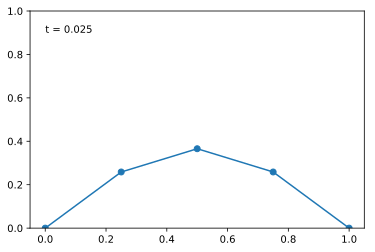

In [45]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.025")

In [46]:
# T[i,t] adalah T[xi,t]
idx_time = 2
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Text(0.0, 0.9, 't = 0.05')

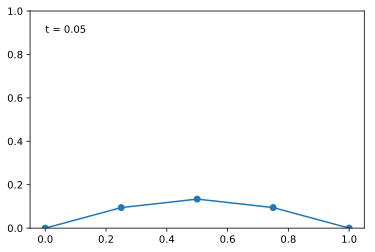

In [47]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.05")

Untuk semua waktu, gunakan loop

In [52]:
for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Misalkan kita ingin mengetahui distribusi suhu pada t = 0.5, atau indeks t = 20

In [55]:
t = k*20
t

0.5

Text(0.0, 0.9, 't = 0.5')

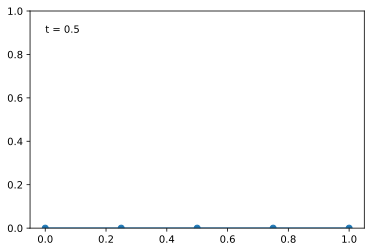

In [56]:
plt.clf()
plt.plot(x, T[:,20], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.5")

Text(0.0, 0.9, 't = 0.25')

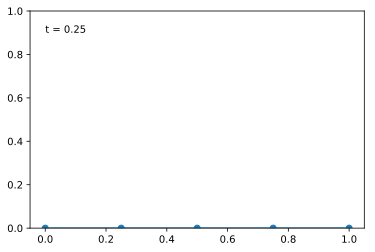

In [57]:
plt.clf()
plt.plot(x, T[:,10], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.25")

In [74]:
def my_gaussian(x, center, alpha):
    return np.exp( -alpha*(x - center)**2 )

Nx =  21
Nt =  1001


Text(0, 0.9, 't = 0')

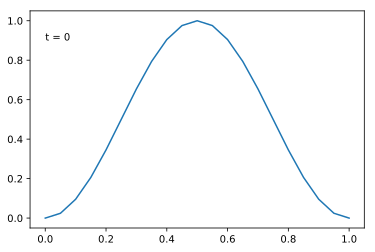

In [114]:
h = 0.05
A = 0.0
B = 1.0
center = 0.5
alpha = 1000
Nx = int( (B-A)/h ) + 1
print("Nx = ", Nx)
x = np.linspace(A, B, Nx)

k = 0.001
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
print("Nt = ", Nt)

t = np.linspace(tmin, tmax, Nt)

T = np.zeros( (Nx,Nt) )

# Syarat awal
T[:,0] = np.sin(np.pi*x)**2

plt.clf()
plt.plot(x, T[:,0])
plt.text(0, 0.9, "t = 0")

In [117]:
λ = k/h**2
print("λ = ", λ)

for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

λ =  0.3999999999999999


Text(0, 0.9, 't = 0.0001')

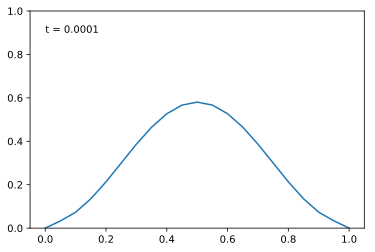

In [119]:
plt.clf()
plt.plot(x, T[:,1])
plt.ylim(0,1)
plt.text(0, 0.9, "t = 0.0001")

In [110]:
my_gaussian(0.0, center, alpha)

2.6691902155412764e-109